- Sequential RANSAC / Recursive-RANSAC
- Hough Transform
- Line Segment Detection
- Convolution: file:///Users/kptruong/Downloads/Efficient_line_detection_method_bas.pdf

# Import data

In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns; sns.set()
# import cv2
from scipy.signal import convolve2d
import torch
import torch.nn.functional as F

from src import dasly, helper

In [2]:
das = dasly.Dasly()
das.load_data(
    folder_path='/media/kptruong/yellow02/Aastfjordbrua/',
    start='20230901 103015',
    # end='20230628 113128',
    duration=60
)

Welcome to Dasly!
7 files, from 103014 to 103114


# Heatmap

Heatmap with vmin -1.21e-05, vmax 1.21e-05


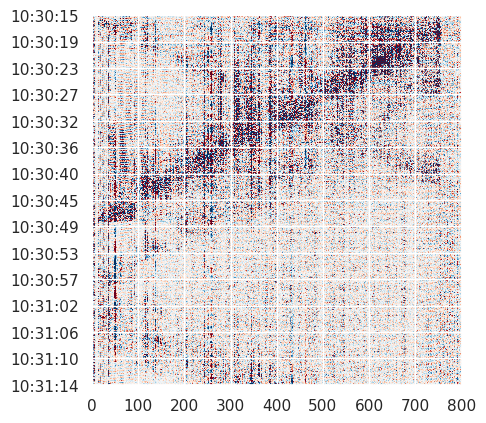

In [3]:
das.heatmap()

Heatmap with vmin -4.15e-08, vmax 4.15e-08


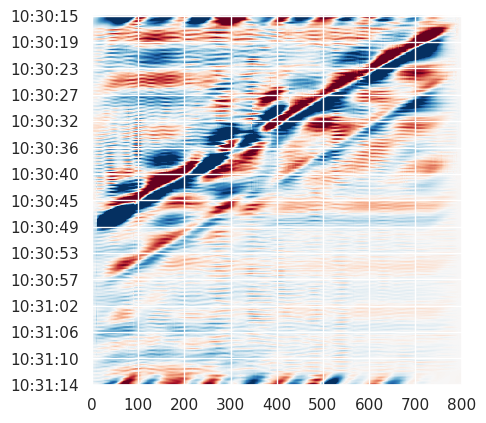

In [15]:
das.reset()
das.sample(10)
das.convolve_torch(90, 95, 20)
das.heatmap()

Heatmap with vmin 0, vmax 8.01e-06


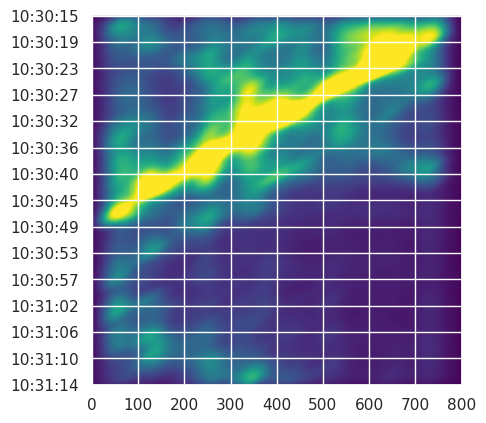

In [16]:
das.reset()
das.sample(10)
das.signal = np.abs(das.signal)
das.convolve_torch(90, 95, 20)
das.heatmap()

Heatmap with vmin -3.66e-08, vmax 3.66e-08


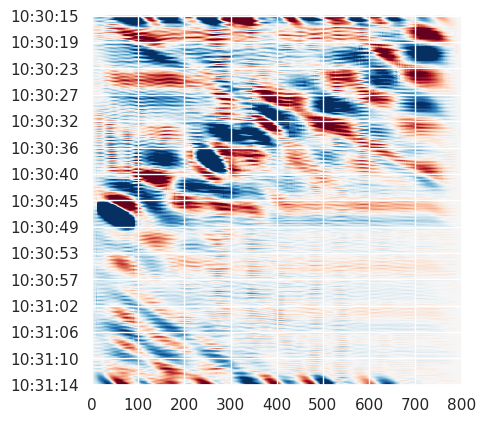

In [17]:
das.reset()
das.sample(10)
das.convolve_torch(-95, -90, 20)
das.heatmap()

Heatmap with vmin 0, vmax 7.89e-06


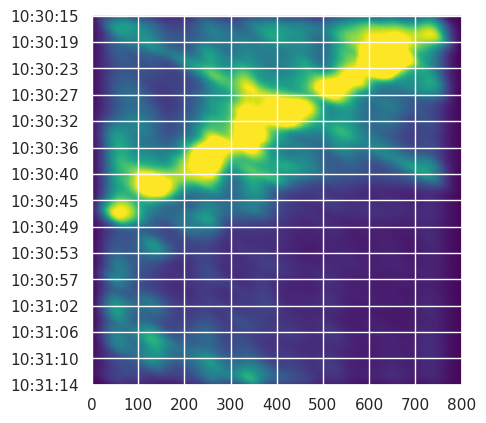

In [18]:
das.reset()
das.sample(10)
das.signal = np.abs(das.signal)
das.convolve_torch(-95, -90, 20)
das.heatmap()

In [19]:
das.get_sampling_rate()

100.0

# Speed - Angle

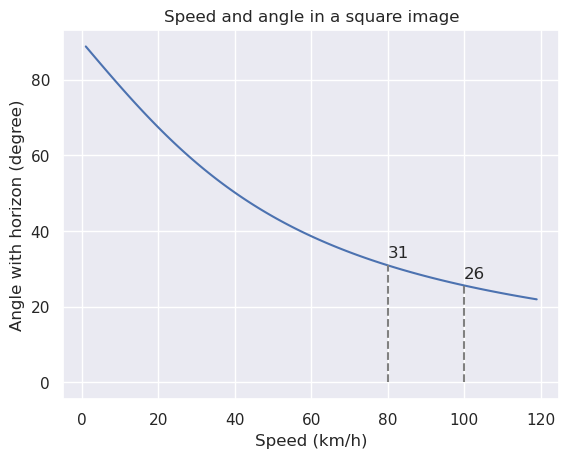

In [8]:
speeds = np.arange(1, 120, 1)
angles = [helper.speed_to_angle(i) for i in speeds]
sns.lineplot(x=speeds, y=angles)
plt.title('Speed and angle in a square image')
plt.xlabel('Speed (km/h)')
plt.ylabel('Angle with horizon (degree)')
plt.vlines(
    x=[80, 100],
    ymin=[0, 0],
    ymax=[helper.speed_to_angle(80), helper.speed_to_angle(100)],
    ls='--',
    color='grey'
)
for i in [80, 100]:
    plt.text(
        x=i,
        y=helper.speed_to_angle(i) + 2,
        s=f'{helper.speed_to_angle(i):.0f}'
    )